# Titanic

https://www.kaggle.com/competitions/titanic


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.shape

(891, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.00,257.35,1.00,223.50,446.00,668.5,891.00
Survived,891.0,0.38,0.49,0.00,0.00,0.00,1.0,1.00
Pclass,891.0,2.31,0.84,1.00,2.00,3.00,3.0,3.00
Age,714.0,29.70,14.53,0.42,20.12,28.00,38.0,80.00
SibSp,891.0,0.52,1.10,0.00,0.00,0.00,1.0,8.00
Parch,891.0,0.38,0.81,0.00,0.00,0.00,0.0,6.00
Fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33


In [7]:
df.describe(include="O").T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [8]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['Deck'] = df['Cabin'].astype(str).str[0]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n


<Axes: xlabel='count', ylabel='Deck'>

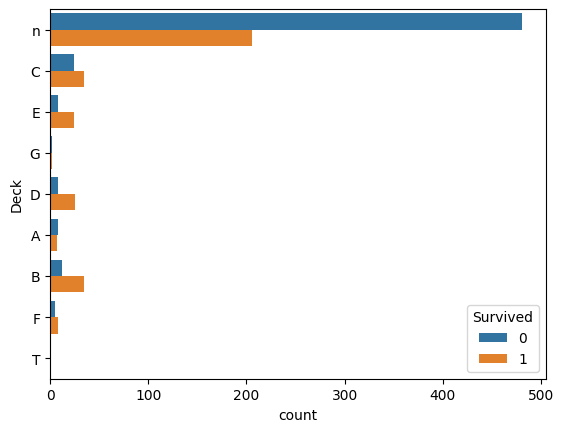

In [11]:
sns.countplot(data=df, y='Deck', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

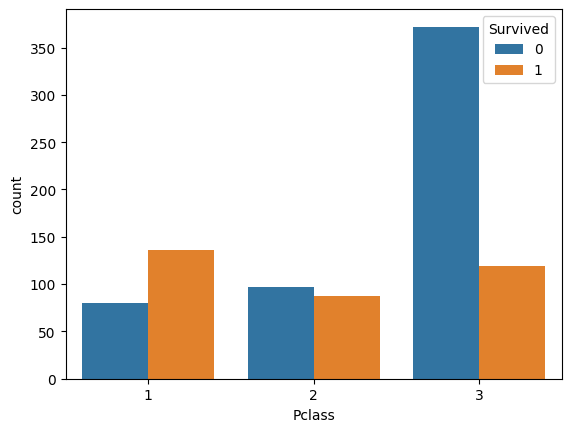

In [12]:
sns.countplot(data=df, x='Pclass', hue='Survived')

## Clean up data

In [13]:
df['Age'].fillna( df['Age'].median(), inplace=True )
df['Embarked'].fillna( df['Embarked'].mode()[0], inplace=True )
df['Fare'].fillna( df['Fare'].median(), inplace=True )

df.isnull().sum().sort_values(ascending=False)

Cabin          687
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Deck             0
dtype: int64

In [15]:
df2 = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Deck      891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [16]:
df_enc = pd.get_dummies(df2)
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
 11  Deck_A      891 non-null    uint8  
 12  Deck_B      891 non-null    uint8  
 13  Deck_C      891 non-null    uint8  
 14  Deck_D      891 non-null    uint8  
 15  Deck_E      891 non-null    uint8  
 16  Deck_F      891 non-null    uint8  
 17  Deck_G      891 non-null    uint8  
 18  Deck_T      891 non-null    uint8  
 19  Deck_n      891 non-null    u

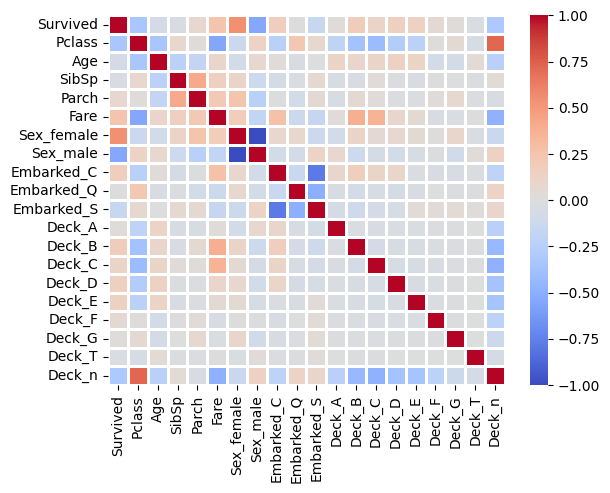

In [17]:
cor = df_enc.corr(numeric_only=True)
plt.figure()
sns.heatmap(cor, cmap="coolwarm", vmin=-1, vmax=1, linewidth=1)
plt.show()

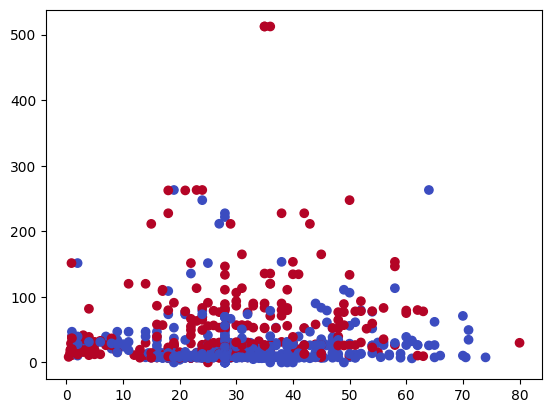

In [18]:
plt.scatter(x=df['Age'], y=df['Fare'], c=df['Survived'], cmap="coolwarm")

## Modelling

In [28]:
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [29]:
target = 'Survived'
features = df_enc.columns[1:]
y = df_enc[target]
X = df_enc[features]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3%}")
print()
print(metrics.classification_report(y_test, y_pred))

Accuracy: 81.564%

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



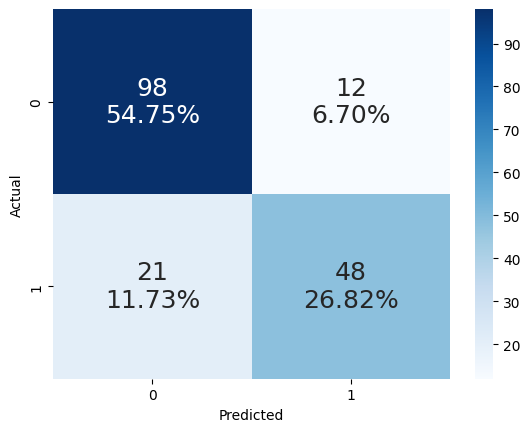

In [49]:
mtx = metrics.confusion_matrix(y_test, y_pred)

group_counts = [ "{0:0.0f}".format(v) for v in mtx.flatten() ]
group_percentages = [ "{0:.2%}".format(v) for v in mtx.flatten()/np.sum(mtx) ]
labels = [ f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages) ]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mtx, annot=labels, fmt='', cmap='Blues', annot_kws={'size': 18})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# probs = model.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr)
plt.text(0.72, 0.05, f"AUC: {auc:.3f}", fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

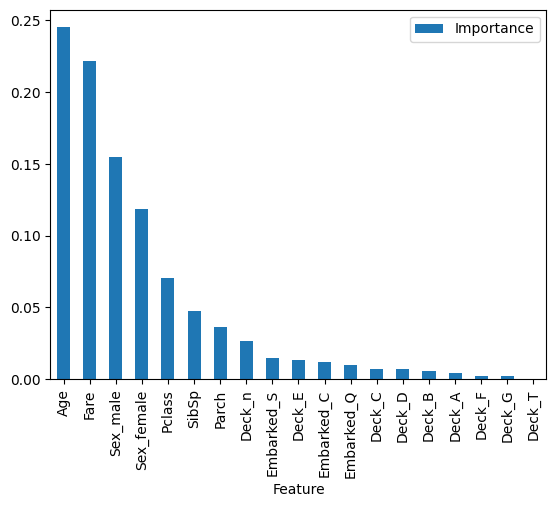

In [40]:
stats = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
})
stats.sort_values(by='Importance', ascending=False, inplace=True)
stats.plot.bar(x='Feature', y='Importance')
plt.show()